In [ ]:
import pandas as pd
import os
import re
from Preprocessing.data_preprocessing import Dataframe_processing

pd.set_option('mode.chained_assignment', None)

path = "Preprocessed_Audio_Recordings"
converters = ["mosfets", "normal", "drossel"]
song_titles = ["ng", "neelix", "pieces"]
merged_subset_df = pd.DataFrame()
for element in os.listdir(path):
    for file in os.listdir(path + "\\" + element + "\\"):
        path_to_file = path + "\\" + element + "\\" + file
        for pattern in converters:
            erg = re.findall(pattern, file)
            if(len(erg)):
                zw_erg = erg[0]

        for title in song_titles:
            title_erg = re.findall(title, file)
            if(len(title_erg)):
                title_zw_erg = title_erg[0]

        df = pd.read_csv(path_to_file)
        merged_subset_df = pd.concat([merged_subset_df, Dataframe_processing.make_subsets(df,5000, zw_erg, 100, title_zw_erg)], ignore_index=True)

merged_subset_df.to_csv("audio_merged_data.csv", index = None)


In [15]:
df = pd.read_csv("audio_merged_data.csv")
df.head()

,T_min,T_max,T_delta,Pow_mean,status,songtitle
0,24.058494,26.562500,2.504006,18.992137,drossel,neelix
1,24.308894,26.812901,2.504006,19.233031,drossel,neelix
2,24.308894,26.812901,2.504006,19.135991,drossel,neelix
3,24.308894,26.812901,2.504006,19.350136,drossel,neelix
4,24.308894,26.812901,2.504006,19.545401,drossel,neelix


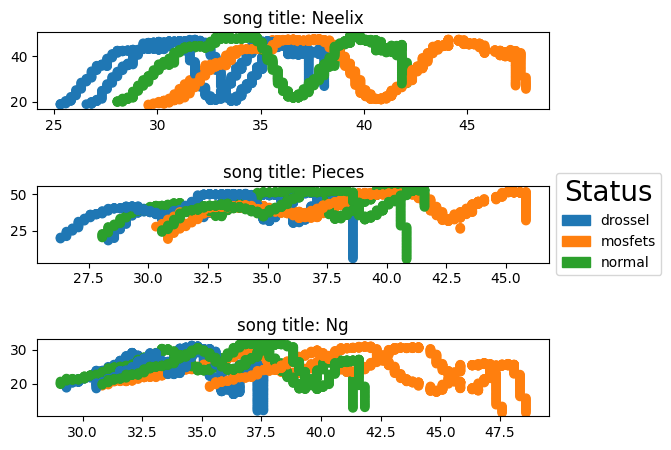

In [30]:
import matplotlib.patches
import matplotlib.pyplot as plt

df_neelix = df[df.songtitle == "neelix"]
df_pieces = df[df.songtitle == "pieces"]
df_ng = df[df.songtitle == "ng"]

fig, axs = plt.subplots(3)
levels, categories = pd.factorize(df_neelix['status'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

axs[0].scatter(df_neelix['T_max'], df_neelix['Pow_mean'], c=colors)
axs[0].set_title("song title: Neelix")

levels, categories = pd.factorize(df_pieces['status'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

axs[1].scatter(df_pieces['T_max'], df_pieces['Pow_mean'], c=colors)
axs[1].set_title("song title: Pieces")
axs[1].legend(handles=handles,title='Status',title_fontsize=20,loc='center left', bbox_to_anchor=(1, 0.5))

levels, categories = pd.factorize(df_ng['status'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

axs[2].scatter(df_ng['T_max'], df_ng['Pow_mean'], c=colors)
axs[2].set_title("song title: Ng")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1.0)
plt.show()
